In [32]:
import pandas as pd

data_path = r"C:\Users\rahul\OneDrive\Documents\student-attendance-performance-ml\Dataset\raw\student-mat.csv"

df = pd.read_csv(data_path, sep=',')
df.columns = df.columns.str.strip().str.lower()
df.columns.tolist()


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3']

In [ ]:
df = pd.read_csv(data_path, sep=',')



In [45]:
df = df.rename(columns={
    'g1': 'internal_exam_1',
    'g2': 'internal_exam_2',
    'g3': 'final_exam_score'
})

df[['internal_exam_1', 'internal_exam_2', 'final_exam_score']].head()


,internal_exam_1,internal_exam_2,final_exam_score
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [21]:
df.columns = df.columns.str.strip().str.lower()
df.columns.tolist()


['school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3']

In [33]:
'absences' in df.columns, 'g3' in df.columns


(True, True)

In [37]:
TOTAL_CLASSES = 200
df['attendance_percentage'] = ((TOTAL_CLASSES - df['absences']) / TOTAL_CLASSES) * 100






In [38]:
df[['absences', 'attendance_percentage']].head()


,absences,attendance_percentage
0,6,97.0
1,4,98.0
2,10,95.0
3,2,99.0
4,4,98.0


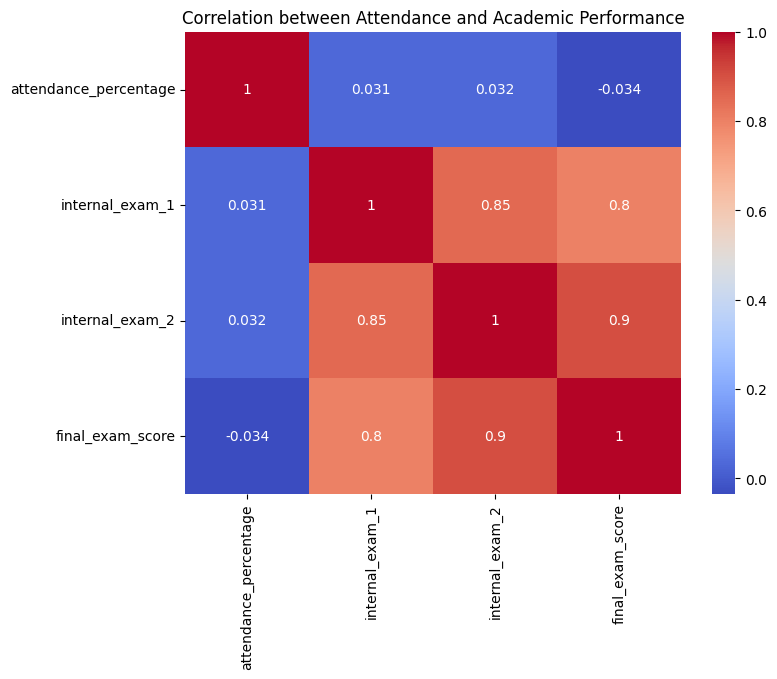

In [47]:
numeric_df = df[['attendance_percentage', 'internal_exam_1', 'internal_exam_2', 'final_exam_score']]

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Attendance and Academic Performance')
plt.show()


In [48]:
# Select required columns
processed_df = df[
    ['attendance_percentage', 'internal_exam_1', 'internal_exam_2', 'studytime', 'failures', 'final_exam_score', 'performance_label']
]

processed_df.head()


,attendance_percentage,internal_exam_1,internal_exam_2,studytime,failures,final_exam_score,performance_label
0,97.0,5,6,2,0,6,Poor
1,98.0,5,5,2,0,6,Poor
2,95.0,7,8,2,3,10,Average
3,99.0,15,14,3,0,15,Good
4,98.0,6,10,2,0,10,Average


In [49]:
processed_df.to_csv(
    "processed/student_attendance_processed.csv",
    index=False
)


In [50]:
processed_df = df[
    [
        'attendance_percentage',
        'internal_exam_1',
        'internal_exam_2',
        'studytime',
        'failures',
        'final_exam_score',
        'performance_label'
    ]
]

processed_df.to_csv(
    "processed/student_attendance_processed.csv",
    index=False
)

processed_df.head()


,attendance_percentage,internal_exam_1,internal_exam_2,studytime,failures,final_exam_score,performance_label
0,97.0,5,6,2,0,6,Poor
1,98.0,5,5,2,0,6,Poor
2,95.0,7,8,2,3,10,Average
3,99.0,15,14,3,0,15,Good
4,98.0,6,10,2,0,10,Average


In [52]:
# ===============================
# 1. Import Required Libraries
# ===============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# ===============================
# 2. Load Processed Dataset
# ===============================

df = pd.read_csv("processed/student_attendance_processed.csv")

print("Dataset Shape:", df.shape)
df.head()


# ===============================
# 3. Feature Selection
# ===============================

X = df[
    [
        'attendance_percentage',
        'internal_exam_1',
        'internal_exam_2',
        'studytime',
        'failures'
    ]
]

y = df['final_exam_score']


# ===============================
# 4. Train-Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


# ===============================
# 5. Train Regression Model
# ===============================

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# ===============================
# 6. Make Predictions
# ===============================

y_pred = regression_model.predict(X_test)


# ===============================
# 7. Model Evaluation
# ===============================

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


# ===============================
# 8. Feature Importance (Coefficients)
# ===============================

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': regression_model.coef_
})

coefficients


Dataset Shape: (395, 7)
Training samples: 316
Testing samples: 79
RMSE: 2.113410327412925
R² Score: 0.7821754247320555


,Feature,Coefficient
0,attendance_percentage,-0.078490
1,internal_exam_1,0.144463
2,internal_exam_2,0.979615
3,studytime,-0.071231
4,failures,-0.455813


In [54]:
# ===============================
# 1. Import Required Libraries
# ===============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ===============================
# 2. Load Processed Dataset
# ===============================

df = pd.read_csv("processed/student_attendance_processed.csv")

print("Dataset Shape:", df.shape)
df.head()


# ===============================
# 3. Feature Selection
# ===============================

X = df[
    [
        'attendance_percentage',
        'internal_exam_1',
        'internal_exam_2',
        'studytime',
        'failures'
    ]
]

y = df['performance_label']


# ===============================
# 4. Encode Target Labels
# ===============================

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nLabel Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(i, "->", label)


# ===============================
# 5. Feature Scaling (IMPORTANT)
# ===============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ===============================
# 6. Train-Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


# ===============================
# 7. Train Classification Model
# ===============================

classifier = LogisticRegression(max_iter=2000)
classifier.fit(X_train, y_train)


# ===============================
# 8. Make Predictions
# ===============================

y_pred = classifier.predict(X_test)


# ===============================
# 9. Model Evaluation
# ===============================

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Dataset Shape: (395, 7)

Label Mapping:
0 -> Average
1 -> Good
2 -> Poor

Accuracy: 0.8354430379746836

Classification Report:

              precision    recall  f1-score   support

     Average       0.86      0.79      0.82        38
        Good       0.93      0.87      0.90        15
        Poor       0.77      0.88      0.82        26

    accuracy                           0.84        79
   macro avg       0.85      0.85      0.85        79
weighted avg       0.84      0.84      0.84        79


Confusion Matrix:

[[30  1  7]
 [ 2 13  0]
 [ 3  0 23]]


In [55]:
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd

# Load processed data
df = pd.read_csv("processed/student_attendance_processed.csv")

# Features & targets
X = df[['attendance_percentage','internal_exam_1','internal_exam_2','studytime','failures']]
y_reg = df['final_exam_score']
y_cls = df['performance_label']

# Encode labels
label_encoder = LabelEncoder()
y_cls_enc = label_encoder.fit_transform(y_cls)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train models
reg_model = LinearRegression().fit(X, y_reg)
cls_model = LogisticRegression(max_iter=2000).fit(X_scaled, y_cls_enc)

# Save everything
joblib.dump(reg_model, "models/regression_model.pkl")
joblib.dump(cls_model, "models/classification_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(label_encoder, "models/label_encoder.pkl")

print("✅ Models saved")


✅ Models saved
